출처 : [Weather Classification | Kaggle](https://www.kaggle.com/nishanthnarayanan/weather-classification)

In [10]:
# 폴더 내용 확인
import os
for dirname, _, filenames in os.walk('images'):
    print(dirname)

images
images/cloudy
images/shine
images/sunrise
images/rainy
images/alien_test
images/foggy


In [11]:
base_dir = os.path.join("images/")
os.listdir(base_dir)

['cloudy', 'shine', 'test.csv', 'sunrise', 'rainy', 'alien_test', 'foggy']

In [12]:
train_dir = "train/"
test_dir = base_dir + "alien_test/"

In [13]:
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        try:
            if os.path.isdir(s):
                shutil.copytree(s, d, symlinks, ignore)
            else:
                shutil.copy2(s, d)
        except:
            continue
            
copytree(base_dir, train_dir)

In [14]:
for i in os.listdir(train_dir):
    if i not in ['sunrise', 'shine', 'cloudy', 'rainy', 'foggy']:
        try:
            os.remove(train_dir + i)
        except:
            shutil.rmtree(train_dir + i)

In [15]:
print("Train directory -->", os.listdir(train_dir))
print("Test directory -->", os.listdir(test_dir)[:5])

Train directory --> ['cloudy', 'shine', 'sunrise', 'rainy', 'foggy']
Test directory --> ['rain_3.jpg', 'sunrise_4.jpg', 'shine_1.jpg', 'rain_2.png', 'sunrise_5.jpg']


In [16]:
import pandas as pd
import numpy as np

import random
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

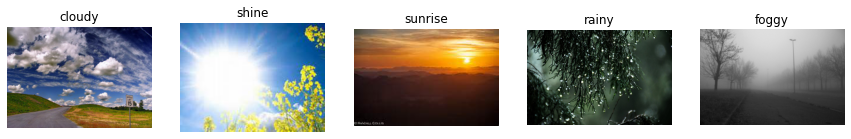

In [40]:
from tensorflow.keras.preprocessing.image import load_img

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i, folder in enumerate(os.listdir(train_dir)):
    sample_paper = random.choice(os.listdir(train_dir + folder))
    image = load_img(train_dir + folder + "/" + sample_paper)
    ax[i].imshow(image)
    ax[i].set_title(folder)
    ax[i].axis("Off")

### CNN Model

In [20]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(5, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## model compile

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

## Image Generator

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.4, # Shifting image width by 40%
      height_shift_range = 0.4,# Shifting image height by 40%
      shear_range = 0.2,       # Rotation across X-axis by 20%
      zoom_range = 0.3,        # Image zooming by 30%
      horizontal_flip = True,
      fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 1500 images belonging to 5 classes.


In [ ]:
train_dir

### 이미지 증강 - TF 예제

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 32
IMG_SIZE = (150, 150)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

In [51]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(width_factor=(-0.2, 0.3), height_factor=(-0.2, 0.3)),
])

In [70]:
IMG_SIZE = 150

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomContrast(1),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


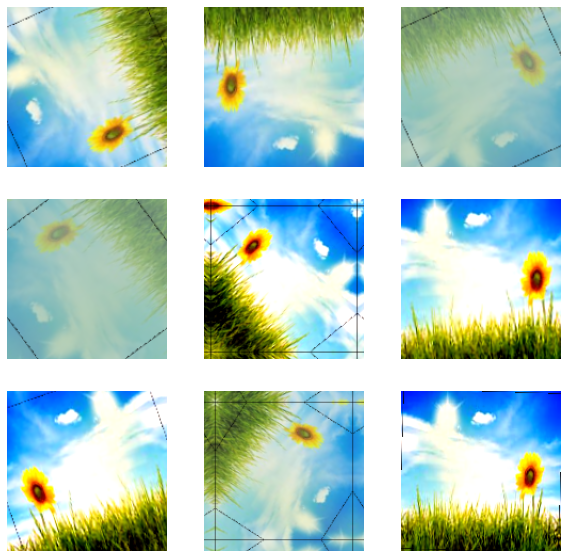

In [71]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [24]:
train_generator.directory

'train/'

In [25]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

## Callback function

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.85):
            print("\nReached >85% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

## 학습

In [36]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(1500/20),  # 1500 images = batch_size * steps
      epochs = 10,
      callbacks=[callbacks],
      verbose = 2)

Epoch 1/10
75/75 - 25s - loss: 0.8490 - accuracy: 0.6560
Epoch 2/10
75/75 - 24s - loss: 0.8364 - accuracy: 0.6573
Epoch 3/10
75/75 - 31s - loss: 0.8353 - accuracy: 0.6647
Epoch 4/10
75/75 - 25s - loss: 0.7985 - accuracy: 0.6740
Epoch 5/10
75/75 - 26s - loss: 0.8218 - accuracy: 0.6653
Epoch 6/10
75/75 - 26s - loss: 0.8035 - accuracy: 0.6780
Epoch 7/10
75/75 - 32s - loss: 0.7897 - accuracy: 0.6820
Epoch 8/10
75/75 - 28s - loss: 0.7685 - accuracy: 0.6933
Epoch 9/10
75/75 - 29s - loss: 0.7849 - accuracy: 0.6880
Epoch 10/10
75/75 - 28s - loss: 0.7329 - accuracy: 0.7067


In [62]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy
0,0.849048,0.656000
1,0.836415,0.657333
2,0.835281,0.664667
3,0.798537,0.674000
4,0.821803,0.665333
5,0.803527,0.678000
6,0.789655,0.682000
7,0.768536,0.693333
8,0.784876,0.688000
9,0.732867,0.706667


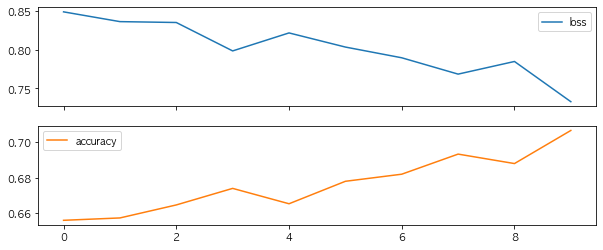

In [66]:
_ = df_hist.plot(subplots=True, figsize=(10, 4))

In [16]:
print("Accuracy of the model on train data is {:.2f}%".format(history.history["accuracy"][-1]*100))

Accuracy of the model on train data is 62.40%


In [17]:
test_img = os.listdir(os.path.join(test_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df.head()

,Image
0,rain_3.jpg
1,sunrise_4.jpg
2,shine_1.jpg
3,rain_2.png
4,sunrise_5.jpg


In [18]:
len(test_df)

30

### Test Generator

In [19]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 30 validated image filenames.


In [20]:
predict = model.predict(test_generator, steps = int(np.ceil(30/20)))

#### Label Mapping

In [21]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'shine', 4: 'sunrise'}

In [22]:
np.argmax(predict, axis = 1)

array([2, 4, 3, 2, 4, 4, 3, 3, 4, 2, 4, 2, 2, 4, 4, 2, 4, 1, 3, 1, 2, 3,
       1, 2, 2, 2, 4, 3, 2, 1])

In [23]:
test_df['Label'] = np.argmax(predict, axis = 1)
test_df['Label'] = test_df['Label'].replace(label_map)

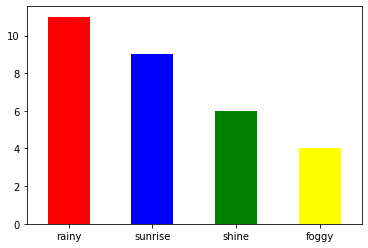

In [24]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green','yellow','orange'])
plt.xticks(rotation = 0)
plt.show()

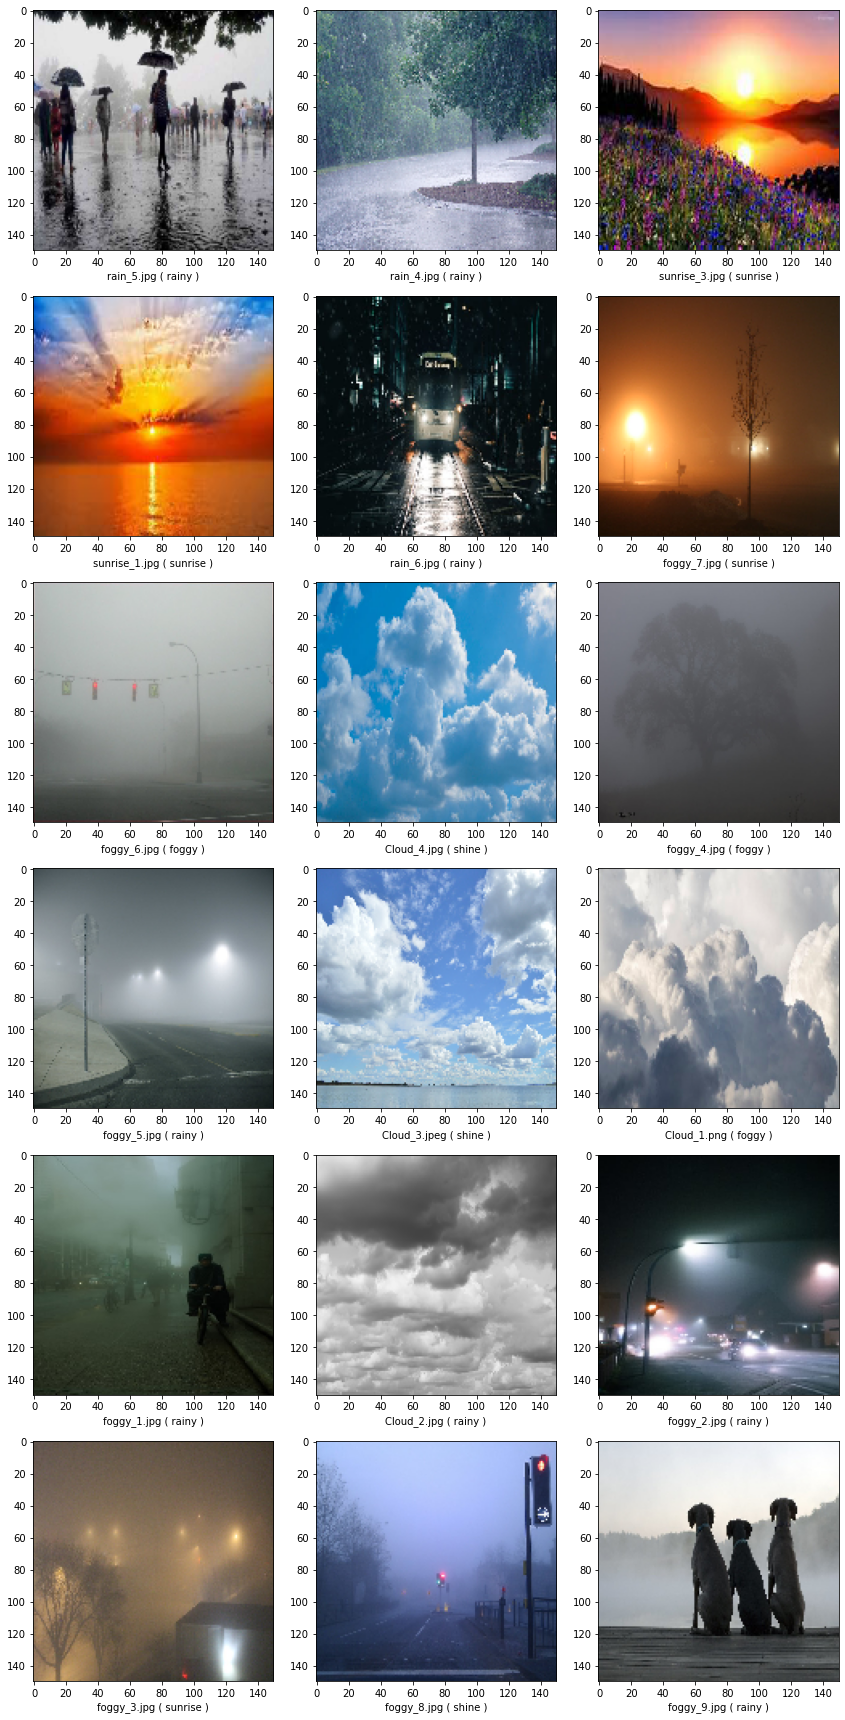

In [25]:
v = random.randint(0, 12)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()